## EDA

In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv('/content/states (1).csv')
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.60%,10.10%,-4.50%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.90%,14.90%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.90%,10.80%,-6.10%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.50%,9.50%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.50%,8.60%,-9.90%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [ ]:
df.isnull().sum()

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 1
Medicaid Enrollment (2013)                      2
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          2
Medicare Enrollment (2016)                      0
dtype: int64

#### So we have missing values at three different columns. Imputing them with Median. On location numbers - 9,10,12.

In [ ]:
df = df.fillna(df.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
df.isnull().sum()

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 0
Medicaid Enrollment (2013)                      0
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          0
Medicare Enrollment (2016)                      0
dtype: int64

#### No more missing values left.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         52 non-null     object 
 1   Uninsured Rate (2010)                         52 non-null     object 
 2   Uninsured Rate (2015)                         52 non-null     object 
 3   Uninsured Rate Change (2010-2015)             52 non-null     object 
 4   Health Insurance Coverage Change (2010-2015)  52 non-null     int64  
 5   Employer Health Insurance Coverage (2015)     52 non-null     int64  
 6   Marketplace Health Insurance Coverage (2016)  52 non-null     int64  
 7   Marketplace Tax Credits (2016)                52 non-null     int64  
 8   Average Monthly Tax Credit (2016)             52 non-null     object 
 9   State Medicaid Expansion (2016)               52 non-null     objec

In [ ]:
df.iloc[:,10] = df.iloc[:,10].astype(int)

In [ ]:
df.iloc[:,12] = df.iloc[:,12].astype(int)

In [ ]:
df['State Medicaid Expansion (2016)'].value_counts()

True     33
False    19
Name: State Medicaid Expansion (2016), dtype: int64

In [ ]:
df['State Medicaid Expansion (2016)'].replace(np.nan,'True', inplace = True )

In [ ]:
df['Medicaid Enrollment (2013)'].mean()

2199503.4615384615

In [ ]:
df['Medicaid Enrollment (2013)'].replace(np.nan,2199503.480769231, inplace = True )

In [ ]:
df['Medicaid Enrollment Change (2013-2016)'].mean()

628473.5769230769

In [ ]:
df['Medicaid Enrollment Change (2013-2016)'].replace(np.nan,628473.5769230769, inplace = True )

In [ ]:
df.isna().sum()

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 0
Medicaid Enrollment (2013)                      0
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          0
Medicare Enrollment (2016)                      0
dtype: int64

In [ ]:
df['State Medicaid Expansion (2016)'].replace('True', 1, inplace = True)
df['State Medicaid Expansion (2016)'].replace('False', 1, inplace = True)

In [ ]:
df['Uninsured Rate (2010)'] = list(map(lambda x: x[:-1], df['Uninsured Rate (2010)'].values))
df['Uninsured Rate (2015)'] = list(map(lambda x: x[:-1], df['Uninsured Rate (2015)'].values))

In [ ]:
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.60,10.10,-4.50%,215000,2545000,165534,152206,$310,False,799176,910775,111599,989855
1,Alaska,19.90,14.90,-5%,36000,390000,17995,16205,$750,True,122334,166625,44291,88966
2,Arizona,16.90,10.80,-6.10%,410000,3288000,179445,124346,$230,True,1201770,1716198,514428,1175624
3,Arkansas,17.50,9.50,-8%,234000,1365000,63357,56843,$306,True,556851,920194,363343,606146
4,California,18.50,8.60,-9.90%,3826000,19552000,1415428,1239893,$309,True,7755381,11843081,4087700,5829777


In [ ]:
df['Uninsured Rate Change (2010-2015)'] = list(map(lambda x: x[:-1], df['Uninsured Rate Change (2010-2015)'].values))

In [ ]:
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.60,10.10,-4.50,215000,2545000,165534,152206,$310,False,799176,910775,111599,989855
1,Alaska,19.90,14.90,-5,36000,390000,17995,16205,$750,True,122334,166625,44291,88966
2,Arizona,16.90,10.80,-6.10,410000,3288000,179445,124346,$230,True,1201770,1716198,514428,1175624
3,Arkansas,17.50,9.50,-8,234000,1365000,63357,56843,$306,True,556851,920194,363343,606146
4,California,18.50,8.60,-9.90,3826000,19552000,1415428,1239893,$309,True,7755381,11843081,4087700,5829777


In [ ]:
df.iloc[:,-2]

0       111599
1        44291
2       514428
3       363343
4      4087700
5       591844
6       234156
7        13378
8        19705
9       539677
10      247211
11       52843
12       55755
13      490996
14      369131
15      125540
16       43478
17      613983
18      308921
19      234156
20      396007
21      387969
22      388949
23      178469
24       56640
25      121200
26       75074
27       -1898
28      281738
29       62347
30      500678
31      309054
32      752748
33      476330
34       19783
35      661689
36       -1507
37      395506
38      497068
39       96340
40      105060
41        4334
42      382584
43      328624
44       20153
45       14516
46       53387
47      670960
48      221101
49       61366
50       -3935
51    16106157
Name: Medicaid Enrollment Change (2013-2016), dtype: int64

### How has the Affordable Care Act changed the rate of citizens with health insurance coverage?

### Which states observed the greatest decline in their uninsured rate?¶


### Did those states expand Medicaid program coverage and/or implement a health insurance marketplace?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


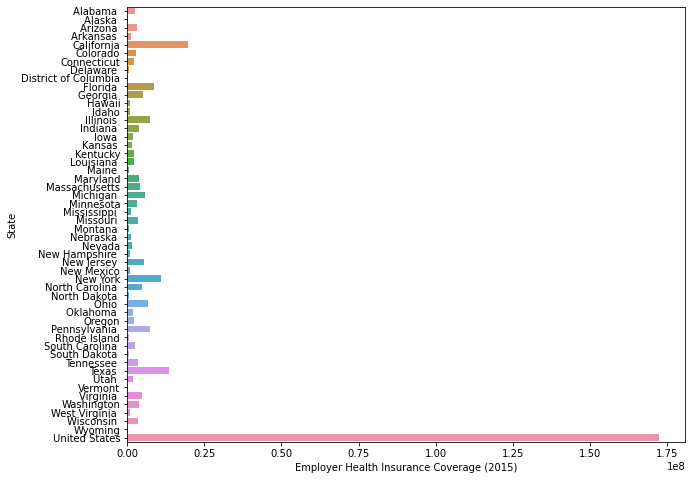

In [ ]:
plt.figure(figsize = (10, 8))
sns.barplot('Employer Health Insurance Coverage (2015)','State', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


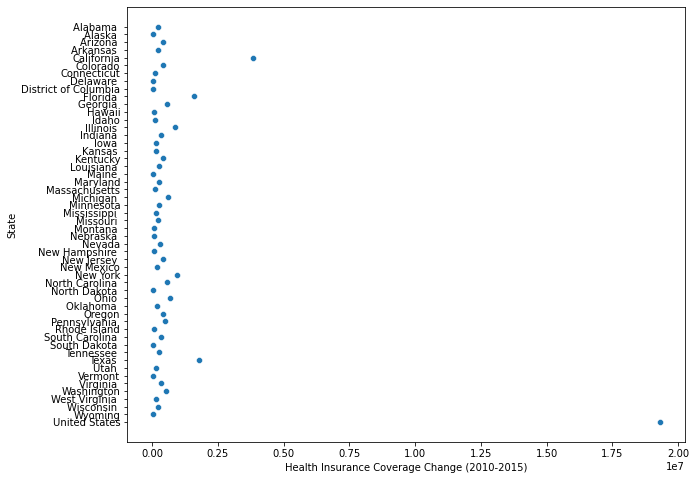

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot('Health Insurance Coverage Change (2010-2015)','State', data = df)

### In 2016, the Marketplace increase in health insurance is not due to State Medicaid expansion

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[(0.0, 1000000.0)]

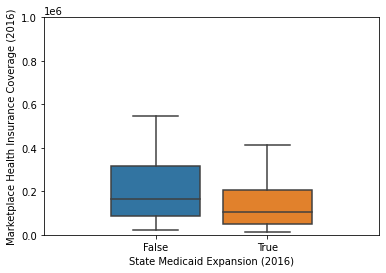

In [ ]:
a_plot = sns.boxplot('State Medicaid Expansion (2016)','Marketplace Health Insurance Coverage (2016)', data = df)
a_plot.set(xlim=(-1, 2))
a_plot.set(ylim=(0,1000000))

## Benford 

In [ ]:
!pip install benfordslaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=a2a56e4fa4885bc82d4b9b28880cd98a6bc1f7f2903a9fb0cf5e5d7581971958
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


### First digit test for Benfords Law

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] No anomaly detected. P=0.432723, Tstat=8.00765


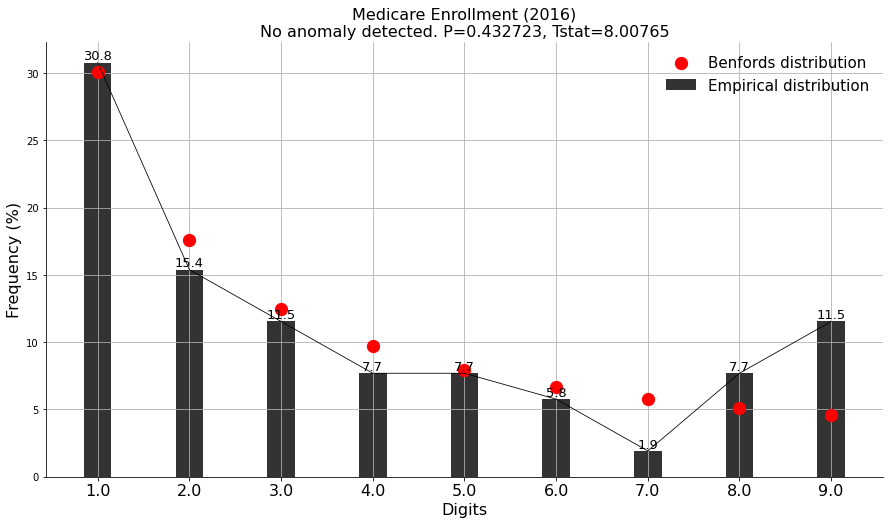

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f81d76965d0>)

In [ ]:
from benfordslaw import benfordslaw

# Initialize
bl1 = benfordslaw(alpha=0.05)

x = np.array(df.iloc[:,13].values)

# Make fit
first_digit = bl1.fit(x)

# Plot
bl1.plot(title='Medicare Enrollment (2016)')

### Second digit test for Benfords Law

[benfordslaw] >Analyzing digit position: [2]
[benfordslaw] >[chi2] No anomaly detected. P=0.284927, Tstat=10.8671


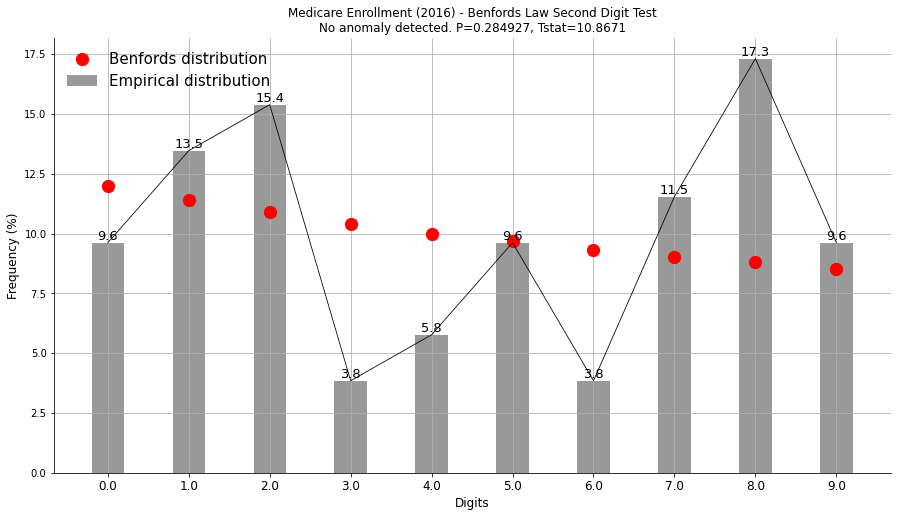

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f81d5a5f750>)

In [ ]:
# Initialize
bl2 = benfordslaw(pos=2)

# Make fit
sec_digit = bl2.fit(x)

# Plot
bl2.plot(title='Medicare Enrollment (2016) - Benfords Law Second Digit Test',
         barcolor=[0.5, 0.5, 0.5], fontsize=12, barwidth=0.4)

### Last digit test for Benfords Law

[benfordslaw] >Analyzing digit position: [-1]
[benfordslaw] >[chi2] Anomaly detected! P=6.04212e-06, Tstat=38.5164


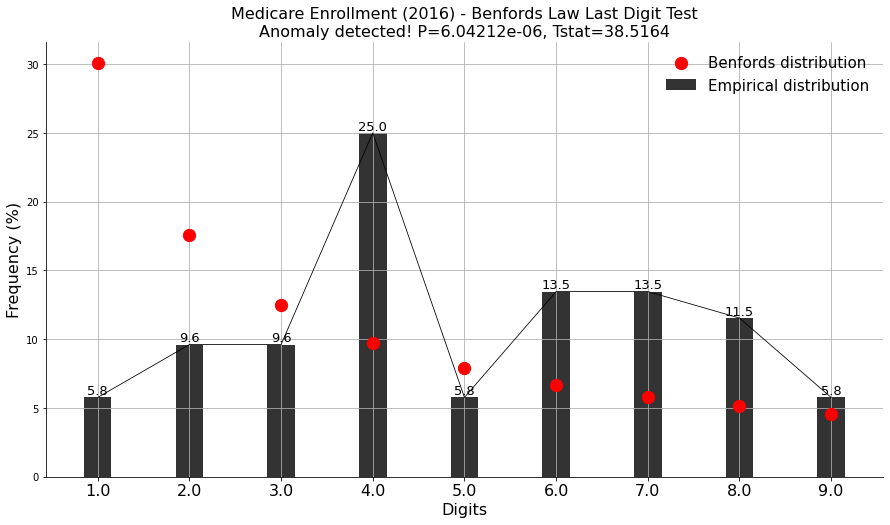

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f81d59a6b90>)

In [ ]:
# Initialize
bllast = benfordslaw(pos=-1)

# Make fit
last_digit = bllast.fit(x)

# Plot
bllast.plot(title='Medicare Enrollment (2016) - Benfords Law Last Digit Test')

#### Benford Law for Second Last Digit 

[benfordslaw] >Analyzing digit position: [-2]
[benfordslaw] >[chi2] No anomaly detected. P=0.861338, Tstat=4.67909


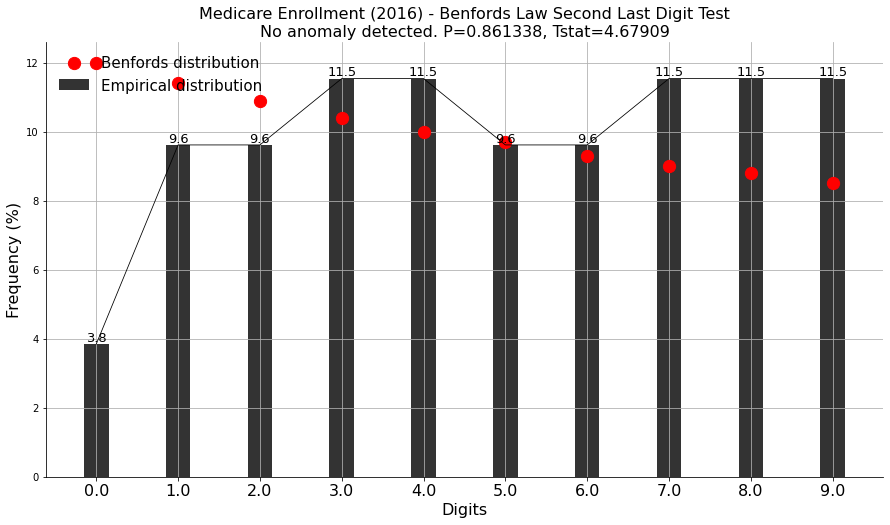

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f81d5947c10>)

In [ ]:
# Initialize
blseclast = benfordslaw(pos=-2)

# Make fit
second_last_digit = blseclast.fit(x)

# Plot
blseclast.plot(title='Medicare Enrollment (2016) - Benfords Law Second Last Digit Test')

## Machine Learning Algorithms 

### Naive Bayes for Supervised Learning

In [ ]:
df.iloc[:,[4,5,6,7,10,11,12,13]]

,Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,215000,2545000,165534,152206,799176,910775,111599,989855
1,36000,390000,17995,16205,122334,166625,44291,88966
2,410000,3288000,179445,124346,1201770,1716198,514428,1175624
3,234000,1365000,63357,56843,556851,920194,363343,606146
4,3826000,19552000,1415428,1239893,7755381,11843081,4087700,5829777
5,419000,2949000,108311,67062,783420,1375264,591844,820234
6,110000,2148000,102917,80759,794613,761137,234156,644136
7,35000,564000,25379,21467,223324,236702,13378,186835
8,25000,388000,17666,1224,235786,255491,19705,90492
9,1597000,8847000,1531714,1428712,3104996,3644673,539677,4149593


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

x = df.iloc[:,[4,5,6,7,10,11,12,13]].values

y = le.fit_transform(df.iloc[:,9])

y


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
y.shape

(52,)

In [ ]:
from sklearn.preprocessing import StandardScaler

# the scaler object (model)
scaler = StandardScaler()
# fit and transform the data
x = scaler.fit_transform(x)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

##### Gaussi Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.45454545454545453


#### SVM Classification

In [ ]:
from sklearn.svm import SVC
SVCClf = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
SVCClf.fit(x_train, y_train)

SVC(kernel='linear', shrinking=False)

In [ ]:
print("SVC score: ",SVCClf.score(x_test, y_test))

SVC score:  0.5454545454545454


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
print("RF score: ",rf.score(x_test, y_test))

RF score:  0.7272727272727273


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


pipe = []
pipe.append(LogisticRegression(solver = 'liblinear'))
pipe.append(SVC(kernel = 'linear',gamma = 'scale', shrinking = False))
pipe.append(KNeighborsClassifier())
pipe.append(DecisionTreeClassifier())
pipe.append(RandomForestClassifier())
pipe.append(GaussianNB())
pipe.append(MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1))
pipe.append(XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005))
pipe.append(AdaBoostClassifier(random_state = 96))

In [ ]:
from sklearn import metrics

from sklearn.metrics import classification_report,confusion_matrix

mod = ['Logistic Regression','SVM','KNN','Decision Tree','Random Forest','Naive Bayes','MLP Classifier','XGBoost','AdaBoost']
acclist = []
auclist = []

cmlist = []

for i in pipe:
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  acclist.append(metrics.accuracy_score(y_test,y_pred))
  fpr,tpr, thresh = metrics.roc_curve(y_test, y_pred)
  auclist.append(round(metrics.auc(fpr,tpr),2))
  cmlist.append(confusion_matrix(y_test,y_pred))

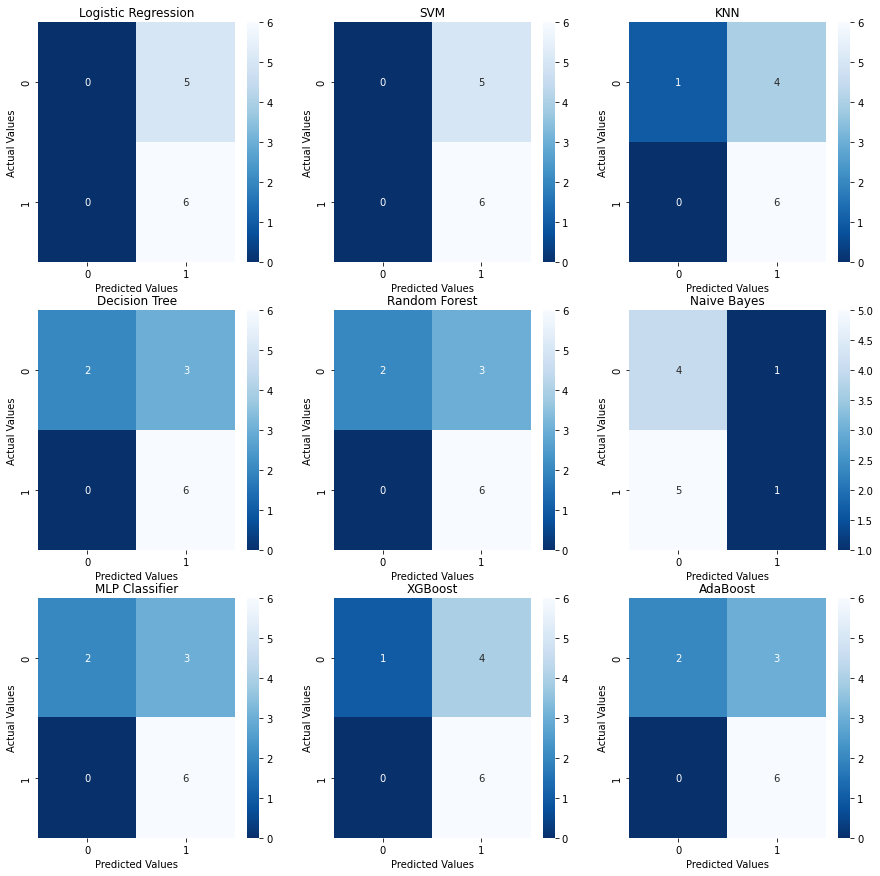

In [ ]:
#plotting confusion matrix


fig = plt.figure(figsize = (15,15))

for i in range(len(cmlist)):
  cm = cmlist[i]
  model = mod[i]
  sub = fig.add_subplot(3,3,i+1).set_title(model)

  cmplot = sns.heatmap(cm,annot = True, cmap = 'Blues_r')
  cmplot.set_xlabel('Predicted Values')
  cmplot.set_ylabel('Actual Values')

In [ ]:
res = pd.DataFrame({'Model':mod, 'Accuracy':acclist,'AUC':auclist})
res

,Model,Accuracy,AUC
0,Logistic Regression,0.545455,0.50
1,SVM,0.545455,0.50
2,KNN,0.636364,0.60
3,Decision Tree,0.727273,0.70
4,Random Forest,0.727273,0.70
5,Naive Bayes,0.454545,0.48
6,MLP Classifier,0.727273,0.70
7,XGBoost,0.636364,0.60
8,AdaBoost,0.727273,0.70


In [ ]:
res.iloc[:,1]

0    0.545455
1    0.545455
2    0.636364
3    0.727273
4    0.727273
5    0.454545
6    0.727273
7    0.636364
8    0.727273
Name: Accuracy, dtype: float64

## Statistical Tests

In [ ]:
from scipy.stats import ttest_ind

Independent t tests

In [ ]:
ttest_ind(df.iloc[:,5], df.iloc[:,6])

Ttest_indResult(statistic=1.882422362241734, pvalue=0.06262870851824211)

## MultiLayer Perceptron

In [ ]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

In [ ]:
#Fitting the training data to the network
classifier.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [ ]:
y_predmlp = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
classifier.score(x_test, y_test)

0.7272727272727273

## Boosting algorithms

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time

### XGBoost

In [ ]:
xgboost = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

xgboost.fit(x_train, y_train)
preds = xgboost.predict(x_test)

In [ ]:
xgboost.score(x_test, y_test)

0.6363636363636364

### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state = 96)

clf.fit(x_train,y_train)

AdaBoostClassifier(random_state=96)

In [ ]:
clf.score(x_train, y_train)

1.0

In [ ]:
clf.score(x_test, y_test)

0.7272727272727273

## Barplot for accuracies

In [ ]:
import seaborn as sns

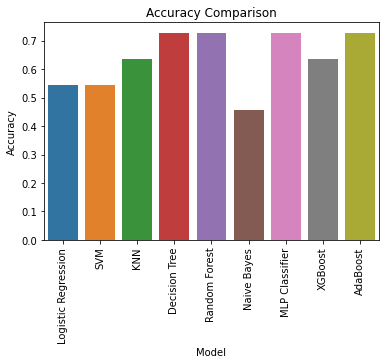

In [ ]:
sns.barplot(x="Model", y="Accuracy",data = res)
plt.xticks(rotation=90)
plt.title('Accuracy Comparison')
plt.show()